<a href="https://colab.research.google.com/github/flybiubiu/cs231n/blob/master/ImageGradients.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/Halfish/cs231n.git
!ls -al
%cd cs231n/assignment3
!pip install imageio
%cd cs231n/datasets/
!/content/cs231n/assignment3/cs231n/datasets/get_coco_captioning.sh
!/content/cs231n/assignment3/cs231n/datasets/get_tiny_imagenet_a.sh
!/content/cs231n/assignment3/cs231n/datasets/get_pretrained_model.sh
%cd '/content/cs231n/assignment3'

Cloning into 'cs231n'...
remote: Enumerating objects: 191, done.
remote: Total 191 (delta 0), reused 0 (delta 0), pack-reused 191
Receiving objects: 100% (191/191), 8.21 MiB | 1.61 MiB/s, done.
Resolving deltas: 100% (66/66), done.
total 20
drwxr-xr-x 1 root root 4096 Jan 10 11:29 .
drwxr-xr-x 1 root root 4096 Jan 10 11:27 ..
drwxr-xr-x 1 root root 4096 Jan  8 16:41 .config
drwxr-xr-x 6 root root 4096 Jan 10 11:29 cs231n
drwxr-xr-x 1 root root 4096 Dec 18 16:52 sample_data
/content/cs231n/assignment3
/content/cs231n/assignment3/cs231n/datasets
--2020-01-10 11:29:33--  http://cs231n.stanford.edu/coco_captioning.zip
Resolving cs231n.stanford.edu (cs231n.stanford.edu)... 171.64.68.10
Connecting to cs231n.stanford.edu (cs231n.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1035210391 (987M) [application/zip]
Saving to: ‘coco_captioning.zip’

coco_captioning.zip 100%[===================>] 987.25M  18.0MB/s    in 71s     

2020-01-10 11:30:

In [2]:
import time, os, json
import numpy as np
import skimage.io
import matplotlib.pyplot as plt

from cs231n.classifiers.pretrained_cnn import PretrainedCNN
from cs231n.data_utils import load_tiny_imagenet
from cs231n.image_utils import blur_image, deprocess_image

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
%load_ext autoreload
%autoreload 2

run the following from the cs231n directory and try again:
python setup.py build_ext --inplace
You may also need to restart your iPython kernel


In [3]:
data = load_tiny_imagenet('cs231n/datasets/tiny-imagenet-100-A', subtract_mean=True)

loading training data for synset 20 / 100
loading training data for synset 40 / 100
loading training data for synset 60 / 100
loading training data for synset 80 / 100
loading training data for synset 100 / 100


In [4]:
print data.keys()

['y_test', 'X_val', 'X_train', 'y_train', 'X_test', 'y_val', 'class_names', 'mean_image']


In [5]:
for i, names in enumerate(data['class_names']):
  print i, ' '.join('"%s"' % name for name in names)

0 "Egyptian cat"
1 "reel"
2 "volleyball"
3 "rocking chair" "rocker"
4 "lemon"
5 "bullfrog" "Rana catesbeiana"
6 "basketball"
7 "cliff" "drop" "drop-off"
8 "espresso"
9 "plunger" "plumber's helper"
10 "parking meter"
11 "German shepherd" "German shepherd dog" "German police dog" "alsatian"
12 "dining table" "board"
13 "monarch" "monarch butterfly" "milkweed butterfly" "Danaus plexippus"
14 "brown bear" "bruin" "Ursus arctos"
15 "school bus"
16 "pizza" "pizza pie"
17 "guinea pig" "Cavia cobaya"
18 "umbrella"
19 "organ" "pipe organ"
20 "oboe" "hautboy" "hautbois"
21 "maypole"
22 "goldfish" "Carassius auratus"
23 "potpie"
24 "hourglass"
25 "seashore" "coast" "seacoast" "sea-coast"
26 "computer keyboard" "keypad"
27 "Arabian camel" "dromedary" "Camelus dromedarius"
28 "ice cream" "icecream"
29 "nail"
30 "space heater"
31 "cardigan"
32 "baboon"
33 "snail"
34 "coral reef"
35 "albatross" "mollymawk"
36 "spider web" "spider's web"
37 "sea cucumber" "holothurian"
38 "backpack" "back pack" "knaps

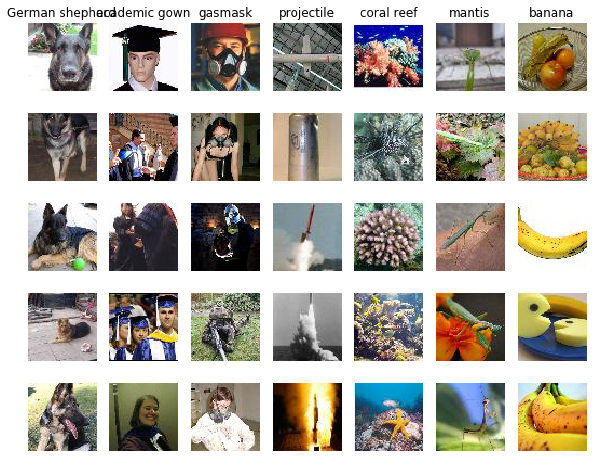

In [9]:
classes_to_show = 7
examples_per_class = 5

class_idxs = np.random.choice(len(data['class_names']), size=classes_to_show, replace=False)
for i, class_idx in enumerate(class_idxs):
  train_idxs, = np.nonzero(data['y_train'] == class_idx)
  train_idxs = np.random.choice(train_idxs, size=examples_per_class, replace=False)
  for j, train_idx in enumerate(train_idxs):
    img = deprocess_image(data['X_train'][train_idx], data['mean_image'])
    plt.subplot(examples_per_class, classes_to_show, 1 + i + classes_to_show * j)
    if j == 0:
      plt.title(data['class_names'][class_idx][0])
    plt.imshow(img)
    plt.gca().axis('off')

plt.show()

In [10]:
model = PretrainedCNN(h5_file='cs231n/datasets/pretrained_model.h5')
print model

NameError: ignored

In [11]:
batch_size = 100

# Test the model on training data
mask = np.random.randint(data['X_train'].shape[0], size=batch_size)
X, y = data['X_train'][mask], data['y_train'][mask]
y_pred = model.loss(X).argmax(axis=1)
print 'Training accuracy: ', (y_pred == y).mean()

# Test the model on validation data
mask = np.random.randint(data['X_val'].shape[0], size=batch_size)
X, y = data['X_val'][mask], data['y_val'][mask]
y_pred = model.loss(X).argmax(axis=1)
print 'Validation accuracy: ', (y_pred == y).mean()

NameError: ignored

In [0]:
from cs231n.layers import softmax_loss

def compute_saliency_maps(X, y, model):
    """
    Compute a class saliency map using the model for images X and labels y.

    Input:
    - X: Input images, of shape (N, 3, H, W)
    - y: Labels for X, of shape (N,)
    - model: A PretrainedCNN that will be used to compute the saliency map.

    Returns:
    - saliency: An array of shape (N, H, W) giving the saliency maps for the input
    images.
    """
    saliency = None
    ##############################################################################
    # TODO: Implement this function. You should use the forward and backward     #
    # methods of the PretrainedCNN class, and compute gradients with respect to  #
    # the unnormalized class score of the ground-truth classes in y.             #
    ##############################################################################
    pass
    scores, cache = model.forward(X)
    loss, dscores = softmax_loss(scores, y)
    dX, grads = model.backward(dscores, cache)
    saliency = dX.max(axis=1)
    print X.shape, dX.shape
    ##############################################################################
    #                             END OF YOUR CODE                               #
    ##############################################################################
    return saliency

In [14]:
def show_saliency_maps(mask):
  mask = np.asarray(mask)
  X = data['X_val'][mask]
  y = data['y_val'][mask]

  saliency = compute_saliency_maps(X, y, model)

  for i in xrange(mask.size):
    plt.subplot(2, mask.size, i + 1)
    plt.imshow(deprocess_image(X[i], data['mean_image']))
    plt.axis('off')
    plt.title(data['class_names'][y[i]][0])
    plt.subplot(2, mask.size, mask.size + i + 1)
    plt.title(mask[i])
    plt.imshow(saliency[i])
    plt.axis('off')
  plt.gcf().set_size_inches(10, 4)
  plt.show()

mask = np.random.randint(data['X_val'].shape[0], size=5)
show_saliency_maps(mask)
show_saliency_maps([128, 3225, 2417, 1640, 4619])

NameError: ignored

In [0]:
import itertools
def make_fooling_image(X, target_y, model):
    """
    Generate a fooling image that is close to X, but that the model classifies
    as target_y.

    Inputs:
    - X: Input image, of shape (1, 3, 64, 64)
    - target_y: An integer in the range [0, 100)
    - model: A PretrainedCNN

    Returns:
    - X_fooling: An image that is close to X, but that is classifed as target_y
    by the model.
    """
    X_fooling = X.copy()
    ##############################################################################
    # TODO: Generate a fooling image X_fooling that the model will classify as   #
    # the class target_y. Use gradient ascent on the target class score, using   #
    # the model.forward method to compute scores and the model.backward method   #
    # to compute image gradients.                                                #
    #                                                                            #
    # HINT: For most examples, you should be able to generate a fooling image    #
    # in fewer than 100 iterations of gradient ascent.                           #
    ##############################################################################
    for i in itertools.count():
        print i
        scores, cache = model.forward(X_fooling, mode='test')
        if scores[0].argmax() == target_y:
            break
        loss, dscores = softmax_loss(scores, target_y)
        dX, grads = model.backward(dscores, cache)
        X_fooling -= dX * 1000
    ##############################################################################
    #                             END OF YOUR CODE                               #
    ##############################################################################
    return X_fooling

In [16]:
while True:
  i = np.random.randint(data['X_val'].shape[0])
  X = data['X_val'][i:i+1]
  y = data['y_val'][i:i+1]
  y_pred = model.loss(X)[0].argmax()
  if y_pred == y: break

target_y = 67
X_fooling = make_fooling_image(X, target_y, model)

# Make sure that X_fooling is classified as y_target
scores = model.loss(X_fooling)
assert scores[0].argmax() == target_y, 'The network is not fooled!'

# Show original image, fooling image, and difference
plt.subplot(1, 3, 1)
plt.imshow(deprocess_image(X, data['mean_image']))
plt.axis('off')
plt.title(data['class_names'][y][0])
plt.subplot(1, 3, 2)
plt.imshow(deprocess_image(X_fooling, data['mean_image'], renorm=True))
plt.title(data['class_names'][target_y][0])
plt.axis('off')
plt.subplot(1, 3, 3)
plt.title('Difference')
plt.imshow(deprocess_image(X - X_fooling, data['mean_image']))
plt.axis('off')
plt.show()

NameError: ignored